In [118]:
import numpy as np
import random as rnd
import itertools
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
n_districts = 40
n_cleaners = 320
cleaner_a = 1
cleaner_b = 2
num_repeat = 100
normal_approx_repeat = 500

In [120]:
cleaners = np.arange(start= 1, stop = n_cleaners+1)
districts = np.arange(start= 1, stop = n_districts+1)
cleaners_per_district =  int(n_cleaners/n_districts)

def chunks(arr, n):
    n = max(1, n)
    return (arr[i:i+n] for i in range(0, len(arr), n))

def common_district(cleaner_1, cleaner_2):
    return indices.get(cleaner_1, set()) & indices.get(cleaner_2, set())

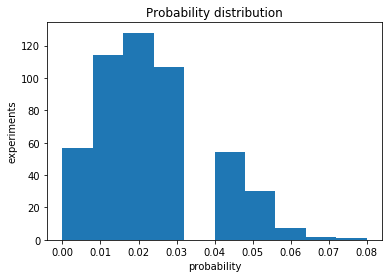


Estimated probability: 2.24%


In [121]:
stats = []
for i in range(0, normal_approx_repeat):
    prob_array = []
    for i in range(0, num_repeat):
        np.random.shuffle(cleaners)
        #print(cleaners, '\n')
        districts_cleaners = list(itertools.islice(chunks(cleaners, cleaners_per_district), n_districts))
        #print('Iteration', i+1, ':\n', list(enumerate(districts_cleaners)), '\n')
        indices = {}
        for j, district in enumerate(districts_cleaners):
            for cleaner in district:
                indices.setdefault(cleaner, set()).add(j)
        ordered_indices = collections.OrderedDict(sorted(indices.items()))
        #print(ordered_indices)
        check = list(common_district(cleaner_a, cleaner_b))
        if len(check) == 0:
            prob_array.append(0)
        #    print('No common district for cleaners A and B', '\n\n')
        else:
            prob_array.append(1)
        #    print('Cleaner A and cleaner B are in disctrict #', check, '\n\n')
    #print('Final results from', num_repeat, 'iterations:\n', prob_array)
    success = 0
    for i in prob_array:
        if i == 1:
                success += 1
    success_rate = success/num_repeat
    stats.append(success_rate)
    #print('\nSuccess rate from the sample of', num_repeat, 'iterations:', success_rate)
plt.hist(stats)
plt.title('Probability distribution')
plt.xlabel('probability')
plt.ylabel('experiments')
plt.show()
print('\nEstimated probability:', "{0:.2%}".format(np.mean(stats)))